In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading datasets and image resizing (for transfer learning models)

In [93]:
data = np.load("/content/drive/MyDrive/Colab Notebooks/pneumoniamnist.npz")

In [94]:
lst = data.files
lst

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [95]:
train_img_resize = np.load("/content/drive/MyDrive/Colab Notebooks/train_img_resize.npy")
val_img_resize = np.load("/content/drive/MyDrive/Colab Notebooks/val_img_resize.npy")
test_img_resize = np.load("/content/drive/MyDrive/Colab Notebooks/test_img_resize.npy")

In [96]:
# resize image
# train_img_resize = [resize(data['train_images'][i], (32, 32)) for i in range(len(data['train_images']))]
# val_img_resize = [resize(data['val_images'][i], (32, 32)) for i in range(len(data['val_images']))]
# test_img_resize= [resize(data['test_images'][i], (32, 32)) for i in range(len(data['test_images']))] 

# np.save("/content/drive/MyDrive/Colab Notebooks/val_img_resize.npy", val_img_resize)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


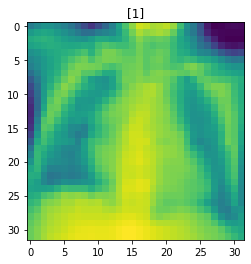

In [97]:
fig = plt.figure
plt.imshow(train_img_resize[0])
plt.title(data['train_labels'][6])
plt.show()

In [98]:
print("originial shape:",data['train_images'][0].shape, "\nresized shape: ", train_img_resize[0].shape)

originial shape: (28, 28) 
resized shape:  (32, 32)


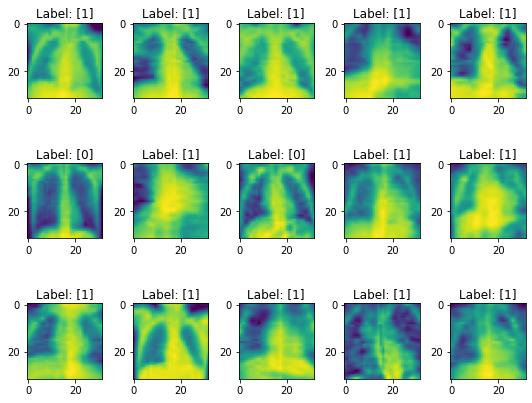

In [99]:
num =15
images = train_img_resize[:num]
labels = data['train_labels'][:num]
num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# Basline Sequential NN model

In [100]:
# model 1 (CNN full layers with dropout)
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
tf.keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

## Tensorflow TPU acceleration

In [30]:
import os
import tensorflow as tf

assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.91.173.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.91.173.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [101]:
# Build mlp
with strategy.scope():
    cnn_model = model
print("CNN_model architecture:")
cnn_model.summary()

CNN_model architecture:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (No

In [102]:
train_img_resize[0].shape

(32, 32)

# Train TPU model

In [103]:
x_train = train_img_resize
x_train = x_train.reshape(-1, 32, 32, 1)
y_train = data['train_labels']

x_val= val_img_resize
x_val= x_val.reshape(-1, 32, 32, 1)
y_val = data['val_labels']

# load model
history = cnn_model.fit(x_train,y_train, batch_size = 32 ,epochs = 12, validation_data=(x_val, y_val))

Epoch 1/12
148/148 [==============================] - 9s 42ms/step - loss: 0.4287 - accuracy: 0.8653 - val_loss: 0.6691 - val_accuracy: 0.7424
Epoch 2/12
148/148 [==============================] - 5s 37ms/step - loss: 0.1640 - accuracy: 0.9407 - val_loss: 2.0741 - val_accuracy: 0.7443
Epoch 3/12
148/148 [==============================] - 5s 35ms/step - loss: 0.1234 - accuracy: 0.9492 - val_loss: 0.2785 - val_accuracy: 0.9046
Epoch 4/12
148/148 [==============================] - 5s 36ms/step - loss: 0.0916 - accuracy: 0.9671 - val_loss: 0.1079 - val_accuracy: 0.9561
Epoch 5/12
148/148 [==============================] - 5s 36ms/step - loss: 0.0781 - accuracy: 0.9713 - val_loss: 0.1163 - val_accuracy: 0.9561
Epoch 6/12
148/148 [==============================] - 5s 37ms/step - loss: 0.0623 - accuracy: 0.9792 - val_loss: 0.1048 - val_accuracy: 0.9580
Epoch 7/12
148/148 [==============================] - 5s 37ms/step - loss: 0.0631 - accuracy: 0.9757 - val_loss: 0.1431 - val_accuracy: 0.9580

# Save TPU model

In [104]:
cnn_model.save('/content/drive/MyDrive/Colab Notebooks/CNN_model/CNN_model.h5', overwrite=True)

# Load TPU model

In [105]:
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CNN_model/CNN_model.h5')

In [106]:
x_test = test_img_resize.reshape(-1, 32, 32, 1)
y_test = data['test_labels']
predictions = cnn_model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 1)','Normal (Class 0)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                     precision    recall  f1-score   support

Pneumonia (Class 1)       0.97      0.66      0.79       234
   Normal (Class 0)       0.83      0.99      0.90       390

           accuracy                           0.87       624
          macro avg       0.90      0.82      0.84       624
       weighted avg       0.88      0.87      0.86       624



In [107]:
# sanity check: accuracy
y_test = y_test.reshape(1,-1)[0]
len(predictions), len(y_test)
np.count_nonzero(predictions==y_test)/len(y_test)

0.8653846153846154

# Transfer Learning with tensor flow

In [159]:
# grayscale to RGB
print(train_img_resize.shape)  #(4708, 32, 32)
train_img_resize_rgb_batch = np.repeat(train_img_resize[..., np.newaxis], 3, -1)
print(train_img_resize_rgb_batch.shape)  #(4708, 32, 32, 3)

print(val_img_resize.shape)  #(524, 32, 32)
val_img_resize_rgb_batch = np.repeat(val_img_resize[..., np.newaxis], 3, -1)
print(val_img_resize_rgb_batch.shape)  #(524, 32, 32, 3)

print(test_img_resize.shape)  #(624, 32, 32)
test_img_resize_rgb_batch = np.repeat(test_img_resize[..., np.newaxis], 3, -1)
print(test_img_resize_rgb_batch.shape)  #(624, 32, 32, 3)

(4708, 32, 32)
(4708, 32, 32, 3)
(524, 32, 32)
(524, 32, 32, 3)
(624, 32, 32)
(624, 32, 32, 3)


In [160]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_img_resize_rgb_batch, data['train_labels']))
validation_dataset = tf.data.Dataset.from_tensor_slices((val_img_resize_rgb_batch, data['val_labels']))
test_dataset =  tf.data.Dataset.from_tensor_slices((test_img_resize_rgb_batch, data['test_labels']))

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)

In [161]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input = tf.keras.applications.resnet50.preprocess_input
# preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

In [162]:
# resnet_v2.preprocess_input will scale input pixels between -1 and 1 (https://keras.io/api/applications/resnet/)
# rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [224]:
keras.backend.clear_session()

In [225]:
BATCH_SIZE = 32
IMG_SIZE = (32, 32)
IMG_SHAPE = IMG_SIZE + (3,)
# IMG_SHAPE = (32,32,1)

# MobileNetV2 need minimum of 128x128 ?
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                                include_top=False,
#                                                weights='imagenet')

base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# base_model = tf.keras.applications.ResNet50V2(input_shape=IMG_SHAPE,
#                                                include_top=False,
#                                                weights='imagenet')

In [226]:
image_batch, label_batch = next(iter(train_dataset))

feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1, 1, 2048)


In [227]:
base_model.trainable = False

In [228]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [229]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [230]:
inputs = tf.keras.Input(shape=(32, 32, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [231]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
len(model.trainable_variables)

2

In [232]:
# Build cnn
with strategy.scope():
    tl_model = model
print("tl_model architecture:")
tl_model.summary()

tl_model architecture:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 32, 32, 3)         0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)         0         
_________________________________________________________________
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)

In [255]:
initial_epochs = 50

loss0, accuracy0 = tl_model.evaluate(validation_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

17/17 [==============================] - 1s 50ms/step - loss: 0.2232 - accuracy: 0.9218
initial loss: 0.22
initial accuracy: 0.92


In [257]:
from keras import backend as K
print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

# Change learning rate to 0.0001 and train for 50 more epochs
K.set_value(model.optimizer.learning_rate, 0.0001)
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate before first fit: 0.001
Learning rate before second fit: 1e-04


In [258]:
history = tl_model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/50
148/148 [==============================] - 8s 55ms/step - loss: 0.2480 - accuracy: 0.8868 - val_loss: 0.2043 - val_accuracy: 0.9179
Epoch 2/50
148/148 [==============================] - 8s 57ms/step - loss: 0.2501 - accuracy: 0.8915 - val_loss: 0.2050 - val_accuracy: 0.9198
Epoch 3/50
148/148 [==============================] - 8s 57ms/step - loss: 0.2477 - accuracy: 0.8932 - val_loss: 0.2044 - val_accuracy: 0.9179
Epoch 4/50
148/148 [==============================] - 8s 57ms/step - loss: 0.2519 - accuracy: 0.8889 - val_loss: 0.2059 - val_accuracy: 0.9179
Epoch 5/50
148/148 [==============================] - 8s 56ms/step - loss: 0.2468 - accuracy: 0.8938 - val_loss: 0.2060 - val_accuracy: 0.9179
Epoch 6/50
148/148 [==============================] - 8s 57ms/step - loss: 0.2457 - accuracy: 0.8885 - val_loss: 0.2058 - val_accuracy: 0.9179
Epoch 7/50
148/148 [==============================] - 8s 57ms/step - loss: 0.2479 - accuracy: 0.8866 - val_loss: 0.2060 - val_accuracy: 0.9179

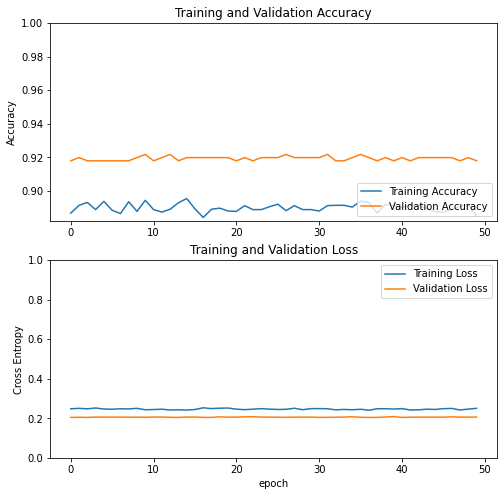

In [259]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine Tuning

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 32, 32, 3)         0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)         0         
_________________________________________________________________
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049  

In [ ]:
len(model.trainable_variables)

92

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 20/30
  6/148 [>.............................] - ETA: 4:27 - loss: 2.7434 - accuracy: 0.5885

KeyboardInterrupt: ignored

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

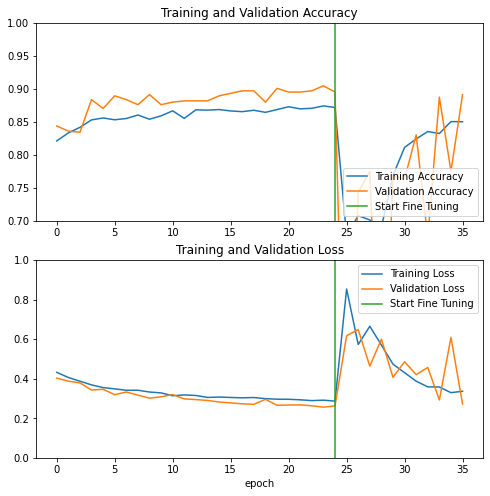

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.7, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Save TPU model

In [260]:
tl_model.save('/content/drive/MyDrive/Colab Notebooks/tl_model/tl_model_300eps_0_001_lr50.h5', overwrite=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Load TPU model

In [268]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/tl_model/tl_model_300eps_0_001_lr50.h5')

# Evaluate model

In [269]:
loss_, accuracy_ = tl_model.evaluate(train_dataset)
print('Test accuracy :', accuracy_)

148/148 [==============================] - 8s 50ms/step - loss: 0.2145 - accuracy: 0.9108
Test accuracy : 0.9107901453971863


In [262]:
loss_, accuracy_ = tl_model.evaluate(validation_dataset)
print('Test accuracy :', accuracy_)

17/17 [==============================] - 1s 70ms/step - loss: 0.2061 - accuracy: 0.9179
Test accuracy : 0.9179389476776123


In [270]:
loss_, accuracy_ = tl_model.evaluate(test_dataset)
print('Test accuracy :', accuracy_)

20/20 [==============================] - 1s 50ms/step - loss: 0.4244 - accuracy: 0.8365
Test accuracy : 0.8365384340286255


Predictions:
 [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1]
Labels:
 [1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1]


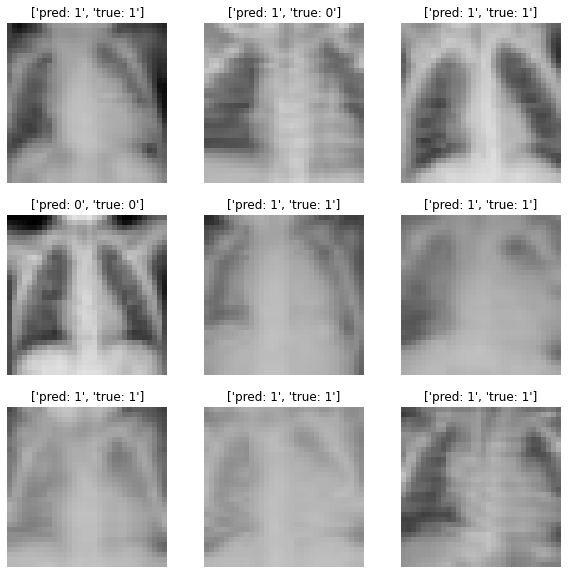

In [276]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = tl_model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch.ravel())

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  plt.title(["pred: " + str(predictions.numpy()[i]), "true: "+ str(label_batch.ravel()[i])])
  plt.axis("off")

# Another Approach